In [88]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [89]:
def draw_graph_with_nx(G):
    pos = nx.spring_layout(G, k=1000, iterations=200)  #k is for spacing between nodes
    options = {'node_color':'pink', 'alpha':1, 'node_size':2500, 'width':0.2, 'font_color':'darkred', 
               'font_size':12, 'arrows':True, 'edge_color':'brown', 
               'arrowstyle':'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    weight_labels = nx.get_edge_attributes(G, 'weight')
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, **options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weight_labels, font_size=10)
    plt.show()

In [90]:
class WeightedDiGraph:
    def __init__(self):
        self.g = {}
        
    def add_node(self, node):
        if node in self.g:
            raise ValueError("Node already in graph")
            
        self.g[node] = []
        
    def add_edge(self, src, dest, time, dist):
            if src not in self.g:
                raise ValueError("Source node not in graph")
                
            if dest not in self.g:
                raise ValueError("Destination node not in graph")
                
            src_edges = self.g[src]
            if dest in src_edges:
                return
                
            src_edges.append( (dest, time, dist) )
            
    def traverse_graph(self, start):
        q = [start]
        visited = []
        
        while q:
            current = q.pop(0)
            
            if current in visited:
                continue
                
            print(current)
            
            visited.append(current)
            
            next_nodes = self.g[current]
            
            for n in next_nodes:
                q.append(n[0])
                
    def find_shortest_dijsktra(self, src, dest):
        to_visit = list( self.g.keys() )
   
        #print("To visit: " + str(to_visit))
    
        inf = float('inf')
        
        dists = {node:inf for node in to_visit}
        time = {node:inf for node in to_visit}
        dists[src] = 0
        time[src] = 0
        #print("All distances" + str(time))
        
        best_paths = {}
        best_paths[(src, src)] = [src]
        
        while to_visit:
            #print('--')
            
            current = min(to_visit, key=lambda node:time[node])
            #print("Current: " + current)
            
            if time[current] == inf:
                break
                
            nexts = self.g[current]
            unvisited_neighbors = []
            for n in nexts:
                if n[0] in to_visit:
                    unvisited_neighbors.append(n)
                    
            #print("Unvisited neighbors of " + current + ":" + str(unvisited_neighbors))

            for n in unvisited_neighbors:
                label = n[0]
                time_to = n[1]
                dist_to = n[2]
                
                old_distance = dists[label]
                new_distance = dists[current] + dist_to
                old_time = time[label]
                new_time = time[current] + time_to
                
                if new_time < old_time:
                    #print("\nFound new best path ...")
                    dists[label] = new_distance
                    time[label] = new_time
                    
                    path_to_current = best_paths[(src, current)][:]
                    best_paths[(src, label)] = path_to_current
                    best_paths[(src, label)].append(label)
                    #print("Previous best path to current: ", best_paths[(src, current)])
                    #print("Best path to:", label, ": ", best_paths[(src, label)])
    
            #print("All distances" + str(time))
            to_visit.remove(current)
        
        return best_paths[(src, dest)], time[dest], dists[dest]
            
    def draw_graph(self):
        G = nx.DiGraph()
        for src in self.g:
            G.add_node(src, label=src)
            for dest in self.g[src]:
                G.add_edge(src, dest[0], weight=str(dest[1]))
        
        draw_graph_with_nx(G)    

In [96]:
g = WeightedDiGraph()

nodes = ['Islamabad', 
          'Peshawar',
          'Gujranwala',
          'Lahore', 
          'Faisalabad', 
          'Multan', 
          'Sukkur', 
          'Hyderabad', 
          'Karachi', 
          'Bannu', 
          'Quetta', 
          'Mianwali']
for n in nodes:
    g.add_node(n)
    
edges_1 = [
    ('Islamabad', 'Peshawar', 140, 180),  #(source, destination, time, distance)
    ('Peshawar', 'Gujranwala', 360, 390),
    ('Gujranwala', 'Lahore', 130, 96),
    ('Gujranwala', 'Faisalabad', 200, 174),
    ('Lahore', 'Multan', 260, 345),
    ('Faisalabad', 'Multan', 200, 240),
    ('Multan', 'Sukkur', 400, 440),
    ('Sukkur', 'Hyderabad', 290, 330),
    ('Hyderabad', 'Karachi', 160, 162),
    ('Peshawar', 'Bannu', 240, 198),
    ('Bannu', 'Quetta', 660, 683),
    ('Quetta', 'Sukkur', 320, 390),
    ('Peshawar', 'Mianwali', 290, 240),
    ('Mianwali', 'Multan', 320, 299),
    ('Islamabad', 'Gujranwala', 230, 220),
    ('Islamabad', 'Lahore', 260, 375)
]
for e in edges_1:
    g.add_edge(e[0], e[1], e[2], e[3])

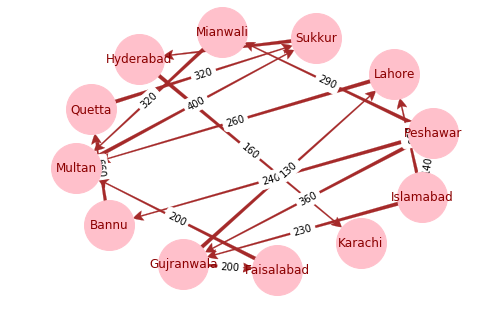

In [97]:
g.draw_graph()

In [98]:
path, time, dist = g.find_shortest_dijsktra('Islamabad', 'Karachi')
print("The shortest path is :", path)
print("The time taken would be :", time, "minutes")
print("The total distance would be :", dist, "km")

The shortest path is : ['Islamabad', 'Lahore', 'Multan', 'Sukkur', 'Hyderabad', 'Karachi']
The time taken would be : 1370 minutes
The total distance would be : 1652 km


In [99]:
class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value
        
    def __str__(self):
        return str(self.value) + " of " + self.suit
    
class Deck:
    def __init__(self):
        self.cards = []
        self.build()
        
    def build(self):
        suits = ["Spades", "Hearts", "Diamonds", "Clubs"]
        for s in suits:
            for v in range(1, 14):
                c = Card(s, v)
                self.cards.append(c)
                
    def shuffle(self):
        import random
        for i in range(0, len(self.cards)):
            r = random.randint(0,i)
            #or r = random.randint(0,len(self.cards)-1)
            self.cards[i], self.cards[r] = self.cards[r], self.cards[i]
            
    def draw(self):
        import random
        r = random.randint(0, len(self.cards))
        card = self.cards.pop(r)
        return card
            
    def __str__(self):
        ret = ""
        for c in self.cards:
            ret = ret + str(c) +'\n'
        return ret

In [100]:
d = Deck()
d.shuffle()
print(d)

9 of Hearts
12 of Spades
9 of Clubs
8 of Spades
10 of Spades
7 of Spades
4 of Hearts
4 of Clubs
5 of Diamonds
10 of Diamonds
2 of Diamonds
8 of Hearts
8 of Diamonds
5 of Spades
13 of Diamonds
5 of Hearts
12 of Clubs
10 of Clubs
6 of Clubs
2 of Hearts
3 of Hearts
2 of Spades
13 of Clubs
9 of Diamonds
11 of Hearts
3 of Clubs
10 of Hearts
11 of Spades
4 of Diamonds
7 of Diamonds
1 of Hearts
6 of Hearts
1 of Diamonds
6 of Diamonds
5 of Clubs
3 of Diamonds
13 of Hearts
7 of Hearts
1 of Spades
6 of Spades
11 of Diamonds
11 of Clubs
2 of Clubs
12 of Diamonds
13 of Spades
12 of Hearts
9 of Spades
4 of Spades
8 of Clubs
1 of Clubs
7 of Clubs
3 of Spades

